<a href="https://colab.research.google.com/github/seokjinwoo/AIandEcon/blob/main/lec5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykrx koreanize-matplotlib

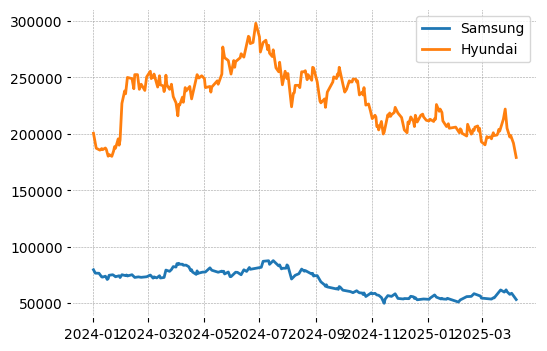

In [28]:
# 삼성전자 주가 시각화

from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd


# 종목코드 (삼성전자: 005930)
samsung_ticker = "005930"
hyundai_ticker = "005380"

samsung_df = stock.get_market_ohlcv_by_date("20240101", "20250407", samsung_ticker)
hyundai_df = stock.get_market_ohlcv_by_date("20240101", "20250407", hyundai_ticker)



# 시각화()
plt.figure(figsize = (6,4))
plt.plot(samsung_df.index, samsung_df['종가'], label = 'Samsung')
plt.plot(hyundai_df.index, hyundai_df['종가'], label = 'Hyundai')

plt.legend()

plt.show()




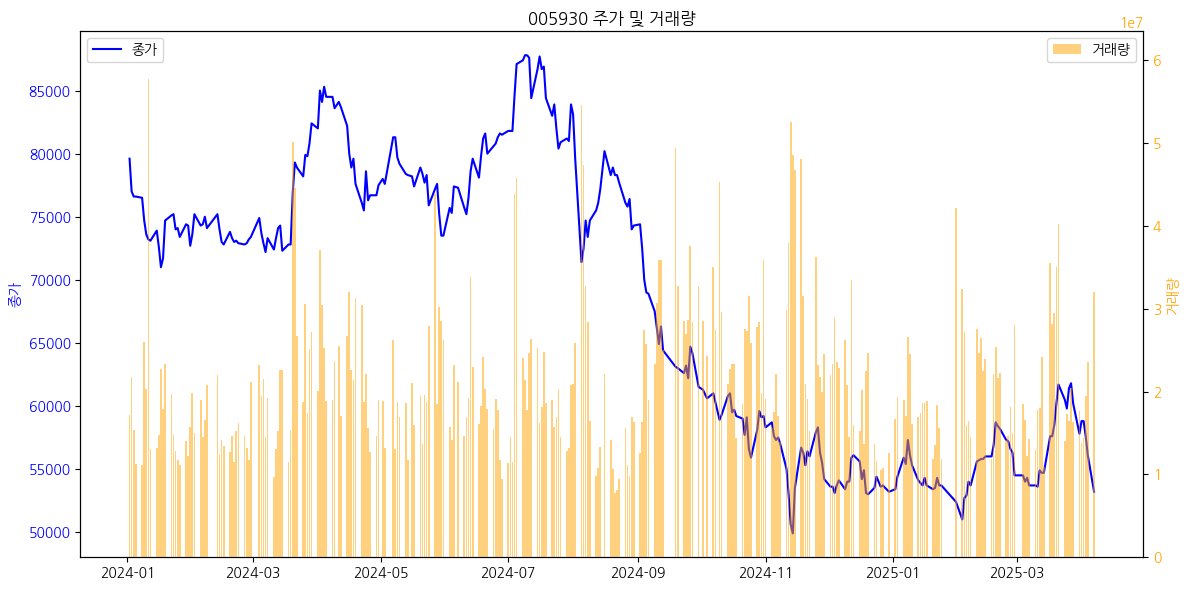

In [16]:
# prompt: 종가는 왼쪽축에 거래량은 오른쪽 축에 그려줘
# 종가는 선그래프로, 거래량은 바그래프로 그려줘.
# 바의 길이는 세로축의 50% 를 넘지 않게

from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

# 삼성전자 주가 시각화

# 종목코드 (삼성전자: 005930)
samsung_ticker = "005930"
hyundai_ticker = "005930"

samsung_df = stock.get_market_ohlcv_by_date("20240101", "20250407", samsung_ticker)
hyundai_df = stock.get_market_ohlcv_by_date("20240101", "20250407", hyundai_ticker)

# 두 개의 y축 생성
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# 종가 선 그래프 (왼쪽 y축)
ax1.plot(df.index, df['종가'], label='종가', color='blue')
ax1.set_ylabel('종가', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# 거래량 바 그래프 (오른쪽 y축)
ax2.bar(df.index, df['거래량'], label='거래량', color='orange', alpha=0.5) # alpha값을 조절하여 바의 투명도 조정
ax2.set_ylabel('거래량', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 거래량 바의 최대 높이를 y축의 50%로 제한
max_volume = df['거래량'].max()
ax2.set_ylim(0, max_volume * 1.1)  # y축 범위 설정 (10% 여유 공간)

ax2.legend(loc='upper right')

plt.title(f"{ticker} 주가 및 거래량")
plt.xticks(rotation=45) # x축 레이블 회전 (필요에 따라 조절)
plt.tight_layout() # 레이아웃 조정
plt.show()


In [ ]:
!pip install mplfinance


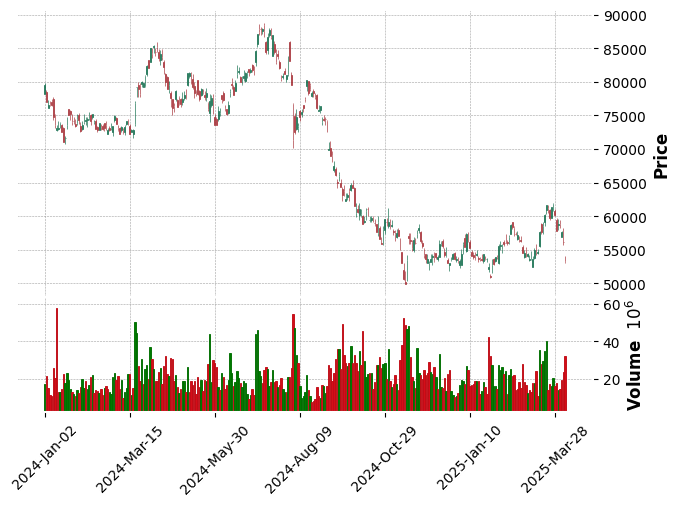

In [23]:
# candle chart

import pandas as pd
from pykrx import stock
import mplfinance as mpf
import koreanize_matplotlib

ticker = "005930"

df = stock.get_market_ohlcv_by_date("20240101", "20250407", ticker)

df = df.rename(
    columns = {
        '시가':'open',
        '고가':'high',
        '저가':'low',
        '종가':'close',
        '거래량':'volume'}
    )

mpf.plot(df, type='candle', style='charles',volume=True)




### Regression 회귀분석

### 계량경제학, machine learning, deep learning

- 알파며 오메가


In [ ]:
import pandas as pd

galton_df = pd.read_csv('/content/galton.csv')
# print(galton_df.head())
# print(galton_df.describe())


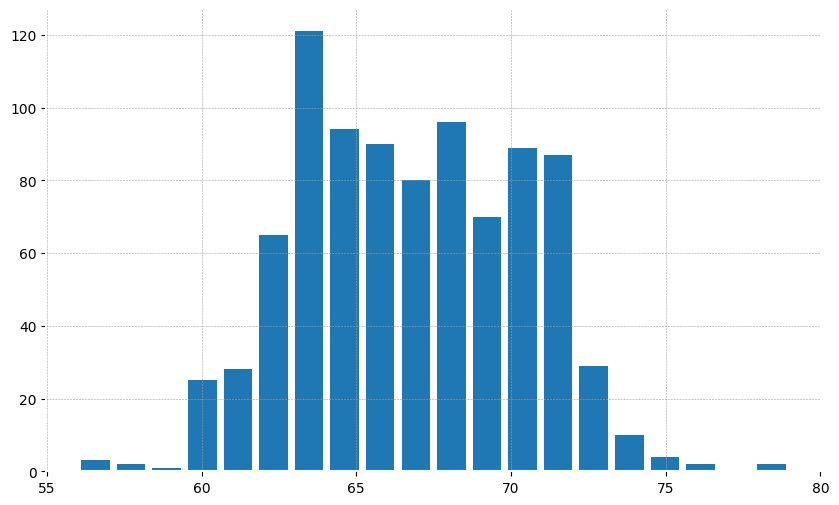

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.hist(galton_df['height'], bins='auto', rwidth=0.8)
plt.show()



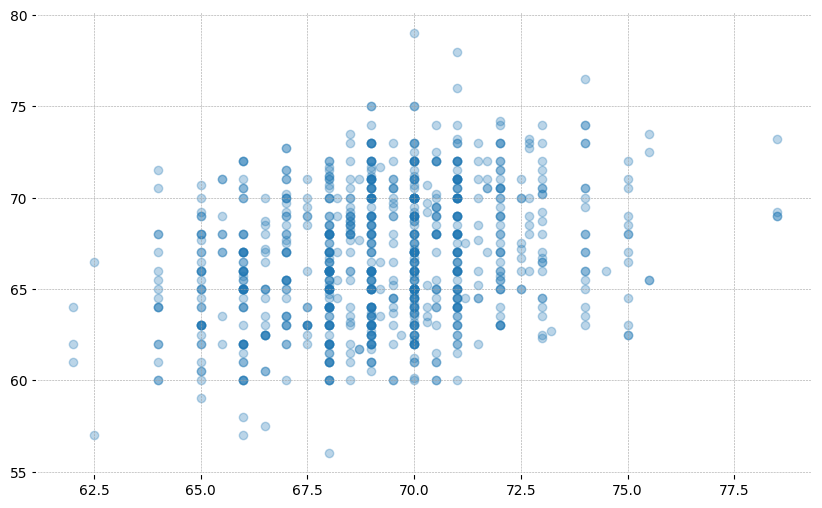

In [37]:
# 아빠의 키와 자녀의 키 사이

# 조건부 기대 함수(X, 아빠의 키)가 직선일 때.
# 어떤 모양.

import matplotlib.pyplot as plt
import koreanize_matplotlib



plt.figure(figsize = (10,6))
plt.scatter(galton_df['father'], galton_df['height'], alpha=0.3)
plt.show()













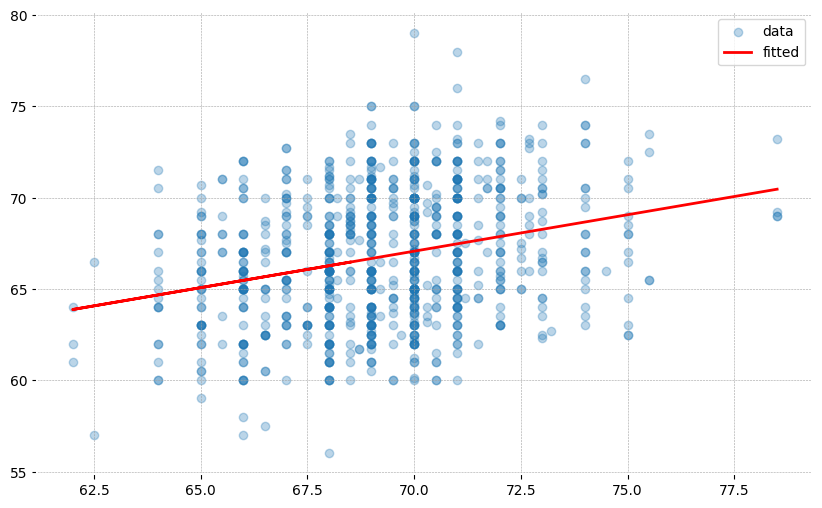

In [40]:
# 아빠의 키와 자녀의 키 사이

# 조건부 기대 함수(X, 아빠의 키)가 직선일 때.
# 어떤 모양.
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
from scipy import stats

slope, intercept = stats.linregress(galton_df['father'], galton_df['height'])[:2]

plt.figure(figsize = (10,6))
plt.scatter(galton_df['father'], galton_df['height'], alpha=0.3, label='data')
plt.plot(galton_df['father'], slope*galton_df['father'] + intercept,
         color = 'red', label = 'fitted')
plt.legend()
plt.show()

- regression line 회귀식. 회귀함수 $E[Y|X]$

1. 회귀식이 의미하는 것은 무엇인가?
2. 회귀식의 기울기(slope)와 절편(intercept)의 의미는?
3. 회귀식 모형은?

---

- 몇 가지 중요한 모형에 대한 가정을 한다.


1. 가정 1(선형): 직선 $Y_i = \beta_0 + \beta_1 X_i + e_i $

2. 가정 2(오차항): $E[e_i] = 0 \rightarrow E[Y_i] = \beta_0 + \beta_1 X_i$

3. 가정 3(등분산성, homeskedasticity) $Var(e_i) = \sigma^2$

4. 가정 4: $cov(e_i, e_j) = 0$ for all $i, j$

5. 가정 5(외생성, exogeneity): $cov(X_i, e_i) = 0$

6. 가정 6(정규성, normality): $e \sim N(0, \sigma^2) $

---

### 최소제곱추정(Least Square Estimation)

- 오차의 제곱의 합을 가장 작게 만들게 모형을 추정한다.

